<a href="https://colab.research.google.com/github/redher97/DheerajReddy_INFO5731_-Fall2021/blob/main/In_class_exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
import nltk;
nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
!pip install gensim==3.8.3
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models



In [ ]:
# Write your code here
import pandas as pd
df =pd.read_csv(r'reviews.csv',index_col=0)

df.head()



,Title,Review,names and dates,ratings
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,dominicwood-145044 September 2021,9/10
1,something unique and fresh,After 10 years of almost every movie being.arm...,laviniadallam2 September 2021,10/10
2,It's a Visual treat,Perfect Fantasy film to watch with full family...,mhatreritesh4 September 2021,9/10
3,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,nishantsalhotrans6 September 2021,10/10
4,"Crouching Tiger, Hidden MARVEL . . . And So MU...","A -BIG- Screen Mini Review. Viewed Sept.05, 20...",Radio-1s_Mr-MovieMad-Ami_104-1FM8 September 2021,9/10


In [ ]:
# Write your code here
import re
df['Review']=df['Review'].apply(str)
data = df.Review.values.tolist()
print(data)

["I'll start by saying that if you're looking for a great story, you'll be disappointed. Shang-Chi is a pretty standard hero's journey at its core, which is a shame because the story could have been inspired by House of Flying Daggers and other wuxia titles.\n\nSo why a rating so high? Because where the story falls, everything else excels.\n\nShang-Chi is visually spectacular and a real treat for the eyes with some visuals that are incredibly distinct for the MCU. In regards to aesthetics, Black Panther walked so Shang-Chi could run a marathon.\n\nThe fight scenes are all amazing. There's one weak fight, but it's meant to be weak, and they're all very long, which is great to see. One of the early ones went on for a solid 5 - 10 minutes, which was unexpected but far from disappointing.\n\nThe first actual fight scene is my favourite in the MCU, and I was worried none of the others would top it, but they were all delightful to watch, and I was so glad they did a parallel of it later on. 

In [ ]:
# Write your answer here (no code needed for this question)

data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
print(data[:1])


['Ill start by saying that if youre looking for a great story, youll be disappointed. Shang-Chi is a pretty standard heros journey at its core, which is a shame because the story could have been inspired by House of Flying Daggers and other wuxia titles. So why a rating so high? Because where the story falls, everything else excels. Shang-Chi is visually spectacular and a real treat for the eyes with some visuals that are incredibly distinct for the MCU. In regards to aesthetics, Black Panther walked so Shang-Chi could run a marathon. The fight scenes are all amazing. Theres one weak fight, but its meant to be weak, and theyre all very long, which is great to see. One of the early ones went on for a solid 5 - 10 minutes, which was unexpected but far from disappointing. The first actual fight scene is my favourite in the MCU, and I was worried none of the others would top it, but they were all delightful to watch, and I was so glad they did a parallel of it later on. Either way, the wri

<>:3: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
C:\Users\reddy\AppData\Local\Temp/ipykernel_17472/1926957766.py:3: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [ ]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['ill', 'start', 'by', 'saying', 'that', 'if', 'youre', 'looking', 'for', 'great', 'story', 'youll', 'be', 'disappointed', 'shang', 'chi', 'is', 'pretty', 'standard', 'heros', 'journey', 'at', 'its', 'core', 'which', 'is', 'shame', 'because', 'the', 'story', 'could', 'have', 'been', 'inspired', 'by', 'house', 'of', 'flying', 'daggers', 'and', 'other', 'wuxia', 'titles', 'so', 'why', 'rating', 'so', 'high', 'because', 'where', 'the', 'story', 'falls', 'everything', 'else', 'excels', 'shang', 'chi', 'is', 'visually', 'spectacular', 'and', 'real', 'treat', 'for', 'the', 'eyes', 'with', 'some', 'visuals', 'that', 'are', 'incredibly', 'distinct', 'for', 'the', 'mcu', 'in', 'regards', 'to', 'aesthetics', 'black', 'panther', 'walked', 'so', 'shang', 'chi', 'could', 'run', 'marathon', 'the', 'fight', 'scenes', 'are', 'all', 'amazing', 'theres', 'one', 'weak', 'fight', 'but', 'its', 'meant', 'to', 'be', 'weak', 'and', 'theyre', 'all', 'very', 'long', 'which', 'is', 'great', 'to', 'see', 'one',

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['ill', 'start', 'by', 'saying', 'that', 'if', 'youre', 'looking', 'for', 'great', 'story', 'youll', 'be', 'disappointed', 'shang_chi', 'is', 'pretty', 'standard', 'heros', 'journey', 'at', 'its', 'core', 'which', 'is', 'shame', 'because', 'the', 'story', 'could', 'have', 'been', 'inspired', 'by', 'house', 'of', 'flying', 'daggers', 'and', 'other', 'wuxia', 'titles', 'so', 'why', 'rating', 'so', 'high', 'because', 'where', 'the', 'story', 'falls', 'everything', 'else', 'excels', 'shang_chi', 'is', 'visually', 'spectacular', 'and', 'real', 'treat', 'for', 'the', 'eyes', 'with', 'some', 'visuals', 'that', 'are', 'incredibly', 'distinct', 'for', 'the', 'mcu', 'in', 'regards', 'to', 'aesthetics', 'black', 'panther', 'walked', 'so', 'shang_chi', 'could', 'run', 'marathon', 'the', 'fight', 'scenes', 'are', 'all', 'amazing', 'theres', 'one', 'weak', 'fight', 'but', 'its', 'meant', 'to', 'be', 'weak', 'and', 'theyre', 'all', 'very', 'long', 'which', 'is', 'great', 'to', 'see', 'one', 'of', 'th

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
nlp = spacy.load("en_core_web_sm")
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ill', 'start', 'say', 'look', 'great', 'story', 'disappoint', 'shang_chi', 'pretty', 'standard', 'shame', 'story', 'inspire', 'house', 'fly', 'dagger', 'title', 'rate', 'high', 'story', 'fall', 'else', 'excel', 'shang_chi', 'visually', 'spectacular', 'real', 'treat', 'eye', 'visual', 'incredibly', 'distinct', 'mcu', 'regard', 'aesthetic', 'black', 'panther', 'walk', 'shang_chi', 'run', 'marathon', 'fight', 'scene', 'amazing', 's', 'weak', 'fight', 'mean', 'weak', 're', 'long', 'great', 'see', 'early', 'one', 'go', 'solid', 'minute', 'unexpected', 'far', 'disappointing', 'first', 'actual', 'fight', 'scene', 'favourite', 'mcu', 'worry', 'none', 'other', 'top', 'delightful', 'watch', 'glad', 'parallel', 'later', 'way', 'writer', 'go', 'hard', 'fight', 'scene', 'pay', 'summary', 'story', 'lack', 'm', 'glad', 'way', 'allow', 'else', 'shine', 'shine', 'hope', 'future', 'director', 'take', 'lesson', 'aesthetic', 'choreography']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 4), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 3), (58, 1), (59, 1), (60, 3), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 4), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 2), (79, 1), (80, 1)]]


In [ ]:
id2word[0]

'actual'

In [ ]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
from gensim.models.wrappers import LdaMallet
mallet_path = r'C:/Users/reddy/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.309*"person" + 0.159*"young" + 0.034*"fighting" + 0.030*"stand" + 0.025*"crouching_tiger" + 0.018*"background" + 0.017*"steal" + 0.017*"hidden_dragon" + 0.015*"compelling" + 0.015*"wenwu"'), (1, '0.099*"boring" + 0.080*"middle" + 0.043*"break" + 0.039*"reference" + 0.027*"free" + 0.003*"prepare" + 0.000*"beautifully" + 0.000*"husband" + 0.000*"typical" + 0.000*"relief"'), (2, '0.000*"prominent" + 0.000*"pleased" + 0.000*"narrate" + 0.000*"conflicting" + 0.000*"wenvus" + 0.000*"unsatisfactory" + 0.000*"tooo" + 0.000*"spiritual" + 0.000*"crawl" + 0.000*"intimidate"'), (3, '0.056*"studio" + 0.043*"beautifully" + 0.034*"happen" + 0.032*"mostly" + 0.029*"large" + 0.027*"consider" + 0.025*"traditional" + 0.025*"material" + 0.024*"pure" + 0.021*"infinity_war"'), (4, '0.086*"need" + 0.050*"bus" + 0.043*"wonderful" + 0.038*"hard" + 0.029*"epic" + 0.028*"visually" + 0.028*"honestly" + 0.027*"amount" + 0.025*"inspire" + 0.023*"comic_book"'), (5, '0.153*"movie" + 0.067*"marvel" + 0.040*"go

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.0599701616679456

Coherence Score:  0.34965991326824925


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.144735  0.000988       1        1  22.745080
15    -0.310483  0.025134       2        1  11.580873
3      0.071768  0.158118       3        1   6.711563
19     0.083664  0.007878       4        1   6.319211
18     0.046127 -0.050534       5        1   5.254635
5     -0.034912 -0.167569       6        1   4.940663
8      0.009896 -0.011652       7        1   4.808996
14     0.063037 -0.036726       8        1   4.717692
12     0.061244 -0.015710       9        1   4.612571
4      0.030096 -0.103021      10        1   4.455380
11     0.035006  0.017541      11        1   3.865399
10     0.026880  0.066833      12        1   3.812766
1     -0.005465  0.013987      13        1   3.452515
17     0.012446  0.012490      14        1   3.187400
6     -0.005045 -0.015204      15        1   2.579920
2     -0.050227 -0.017926      16        1   2.244250
0     -0.027653  0.053898      17        1   2.020751
16    -0.019241  0.007743      18        1   1.976565
13    -0.053863  0.041094      19        1   0.660626
9     -0.078010  0.012638      20        1   0.053142, topic_info=      Term       Freq      Total Category  logprob  loglift
99   movie  65.000000  65.000000  Default  30.0000  30.0000
117   film  20.000000  20.000000  Default  29.0000  29.0000
66   story  23.000000  23.000000  Default  28.0000  28.0000
94    good  30.000000  30.000000  Default  27.0000  27.0000
100    new   8.000000   8.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
100    new   0.001307   8.895724  Topic20  -6.7291  -1.2857
24      go   0.001306   8.198332  Topic20  -6.7301  -1.2050
267   know   0.001305   5.018470  Topic20  -6.7309  -0.7150
40     mcu   0.001304  16.890857  Topic20  -6.7312  -1.9289
93     get   0.001304   6.555379  Topic20  -6.7316  -0.9829

[1062 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
151       1  0.634831    absolute
151       5  0.317415    absolute
152       4  0.430034  absolutely
152      18  0.430034  absolutely
153       2  0.687222  accustomed
...     ...       ...         ...
113      17  0.198847        year
396      16  0.895129        yeoh
397       2  0.710288         yet
397      18  0.355144         yet
654       7  0.765351       young

[1154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 16, 4, 20, 19, 6, 9, 15, 13, 5, 12, 11, 2, 18, 7, 3, 1, 17, 14, 10])

In [ ]:
!pip install gensim==3.8.3

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df =pd.read_csv(r'reviews.csv',index_col=0)

df.head()

,Title,Review,names and dates,ratings
0,Who knew a superhero film could be so beautiful?,I'll start by saying that if you're looking fo...,dominicwood-145044 September 2021,'9/10
1,something unique and fresh,After 10 years of almost every movie being.arm...,laviniadallam2 September 2021,'10/10
2,It's a Visual treat,Perfect Fantasy film to watch with full family...,mhatreritesh4 September 2021,'9/10
3,Best non-avengers MCU movie,Keeping it short. This movie had it all. Great...,nishantsalhotrans6 September 2021,'10/10
4,Fun Film That Does What It Is Supposed To,Brought to you by the Truth Tellers.\n\nFilm i...,truthtellers-168251 September 2021,'8/10


In [ ]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles
docs_list,titles=load_data(r'','reviews.csv')

Total Number of Documents: 3613


In [ ]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    print(df.Review)
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        i=str(i)
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts
texts=preprocess_data(docs_list)

0       I'll start by saying that if you're looking fo...
1       After 10 years of almost every movie being.arm...
2       Perfect Fantasy film to watch with full family...
3       Keeping it short. This movie had it all. Great...
4       Brought to you by the Truth Tellers.\n\nFilm i...
                              ...                        
1197    As others have mentioned the fight choreograph...
1198    I'll keep it short & sweet. This way exceeded ...
1199    Stunts and fight scenes are best.. But story c...
1200    Shang-Chi and the legend of Sumi Liu is gorgeo...
1201    Technically Strong Movie. All Action Scenes Ar...
Name: Review, Length: 1202, dtype: object


In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix
dictionary,doc_term_matrix=prepare_corpus(texts)

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
lsa_model=create_gensim_lsa_model(texts,10,1000)

[(0, '0.535*"movi" + 0.335*"10" + 0.282*"marvel" + 0.218*"film" + 0.214*"2021" + 0.208*"septemb" + 0.171*"shang" + 0.167*"chi" + 0.135*"charact" + 0.133*"action" + 0.127*"good" + 0.122*"great" + 0.112*"scene" + 0.110*"like" + 0.109*"mcu" + 0.107*"one" + 0.106*"stori" + 0.100*"best" + 0.095*"fight" + 0.092*"watch" + 0.084*"realli" + 0.078*"see" + 0.072*"well" + 0.066*"love" + 0.061*"time" + 0.060*"also" + 0.060*"amaz" + 0.057*"much" + 0.053*"make" + 0.052*"visual" + 0.051*"feel" + 0.050*"ring" + 0.049*"9" + 0.047*"act" + 0.046*"new" + 0.045*"go" + 0.043*"end" + 0.043*"enjoy" + 0.043*"ten" + 0.042*"asian" + 0.041*"beauti" + 0.041*"first" + 0.040*"martial" + 0.040*"expect" + 0.040*"even" + 0.039*"art" + 0.038*"simu" + 0.037*"better" + 0.037*"superhero" + 0.036*"say" + 0.036*"would" + 0.036*"origin" + 0.035*"fan" + 0.035*"get" + 0.035*"8" + 0.034*"lot" + 0.034*"seen" + 0.034*"liu" + 0.033*"cgi" + 0.033*"thing" + 0.032*"way" + 0.032*"effect" + 0.031*"cast" + 0.031*"chines" + 0.031*"black" +

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=10, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
model_list,coherence_values=compute_coherence_values(dictionary,doc_term_matrix,texts,12,2,1)

In [ ]:
def plot_graph(doc_clean,start,stop,step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start,stop,step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

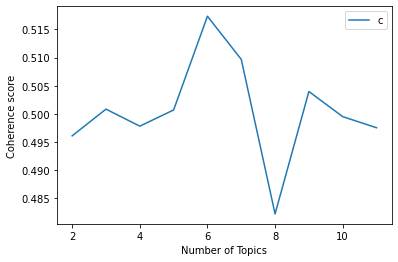

In [ ]:
start,stop,step=2,12,1
plot_graph(texts,start,stop,step)

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
The simplest way is the LSA algorithm, which is straightforward to learn and implement.
In comparison to the vector space model, it also produces better outcomes. 
Because it simply includes document term matrix decomposition, it is faster than other current techniques.

The issue with LDA is that it is harder to implement it when compared to LSA. On top of that the limitations of LDA makes all the hard work unreasonable,
i have mentioned few below:
Fixed K (the number of topics is fixed and must be known ahead of time)
Uncorrelated topics (Dirichlet topic distribution cannot capture correlations)
Static
Unsupervised

Hence, LSA is simpler to implement with better outcomes.
